#HW5 N-step TD method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

### Enviroment
1. Episode task, $\gamma$ =1, $\alpha$=0.1, $\epsilon$=0.3
2. r=-100 if moves into the swamps; all other transitions yield r=-1
3. Use 30 simulation runs to estimate the average value 
4. Environment size is 10x5 

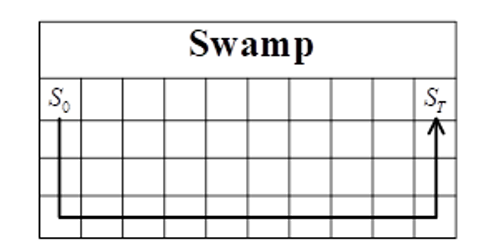

In [2]:
gamma=1
alpha=0.1
epsilon=0.3
L = 10
D = 5
s0=[0,3]
sT=[9,3]
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
rd.seed(36)
tempQ = rd.rand(10,5,4)
tempQ[9,3,:] =np.zeros(4)
tempQ = np.array(tempQ, dtype=np.float64)

In [3]:
def step(state,action):
  state_n = (state+ACTIONS[action]).tolist()
  if state_n[0]<0 or state_n[0]>=L or state_n[1]>=D or state_n[1]<0:
    state_n = state
  if state_n[1] == D-1:
    return state_n,-100
  return state_n,-1

In [4]:
def epsilon_greedy(q,s,epsilon):
  if rd.random()<epsilon:
    return rd.randint(0,4)
  else:
    return np.argmax(q[s[0],s[1],:])

1-step sarsa $$S_0\rightarrow A_0 \rightarrow R_0,S_1$$
3-step sarsa $$S_0\rightarrow A_0 \rightarrow R_0,S_1\rightarrow A_1 \rightarrow R_1,S_2\rightarrow A_2 \rightarrow R_2,S_3$$
$$S_{T-3}\rightarrow A_{T-3} \rightarrow R_{T-3},S_{T-2}\rightarrow A_{T-2} \rightarrow R_{T-2},S_{T-1}\rightarrow A_{T-1} \rightarrow R_{T-1},S_T$$


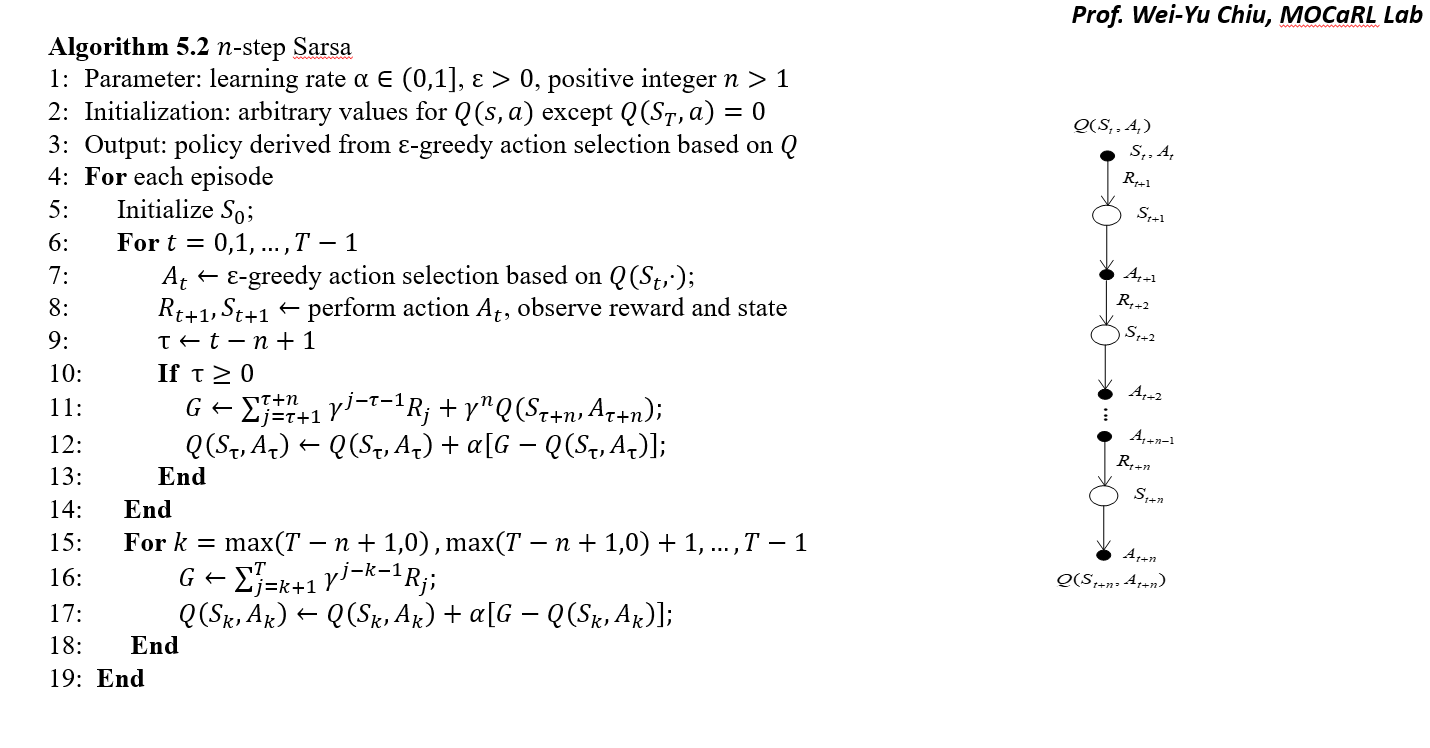

In [12]:
def sarsa5(n=5,episode=1000):
  returns = []    
######## YOUR CODE HERE ########
  gammas = [np.power(gamma,i) for i in range(n)]
  Q=tempQ.copy()
  for i in range(episode):
    t=0
    state = s0
    action = epsilon_greedy(Q,state,epsilon)
    states = []
    rewards = []
    actions = []
    r=0
    while np.array_equal(state,sT)==False:
      actions.append(action)
      states.append(state)
      state,reward_next = step(state,action)
      action = epsilon_greedy(Q,state,epsilon)
      rewards.append(reward_next)
      r+=reward_next
      G=0
      if len(rewards)==n:
        G = np.sum(np.multiply(rewards,gammas))
        G+=np.power(gamma,n)*Q[state[0],state[1],action]
        Q[states[0][0],states[0][1],actions[0]]=Q[states[0][0],states[0][1],actions[0]]\
        +alpha*(G-Q[states[0][0],states[0][1],actions[0]]) 
        rewards.pop(0)
        actions.pop(0)
        states.pop(0)
    G=0
    for i in range(len(rewards)):
      G = rewards[i]+G*gamma
      Q[states[i][0],states[i][1],actions[i]]=Q[states[i][0],states[i][1],actions[i]]\
      +alpha*(G-Q[states[i][0],states[i][1],actions[i]])
    returns.append(r)
####################################
  return returns,Q

In [6]:
def sarsa(episode):
######## YOUR CODE HERE ########  
  returns = []
  Q = tempQ.copy()
  for i in range(episode):
    state=s0
    G=0
    tmp_return=0
    action=epsilon_greedy(Q,state,epsilon)
    while np.array_equal(state,sT)==False:
      state_next,reward=step(state,action)
      G=reward+gamma*G
      action_next=epsilon_greedy(Q,state_next,epsilon)
      Q[state[0],state[1],action]=Q[state[0],state[1],action]+alpha*(reward+\
      gamma*Q[state_next[0],state_next[1],action_next]-Q[state[0],state[1],action])
      state = state_next
      action = action_next
    returns.append(G)###
####################################
  return returns,Q

# Result(60%):

Average 30 simulation, 1000 episode per simulation.

In [7]:
def averages(a):
  return np.array([np.average(a[:i+1]) for i in range(len(a))])

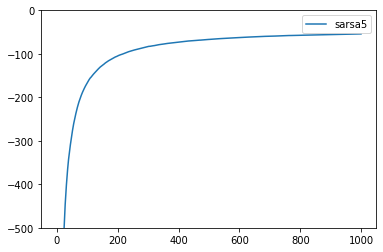

In [13]:
plt.plot(np.average([averages(sarsa5()[0]) for i in range(30)],axis=0),label='sarsa5')
plt.ylim(-500, 0)
plt.legend()
plt.show()

#Experiments and Analysis(40%)

1. Plot the Q-values of Sarsa and 5-steps Sarsa, and explain your result.(15%)
2. Plot the average returns of Sarsa and 5-steps Sarsa, and explain your result(15%)
3. Varying n-steps and get average returns, then compare by overlap the plot(10%) 



1. Plot the Q-values of Sarsa and 5-steps Sarsa, and explain your result.(15%)

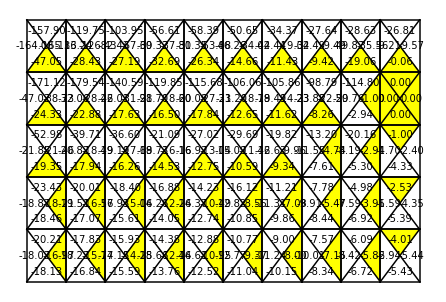

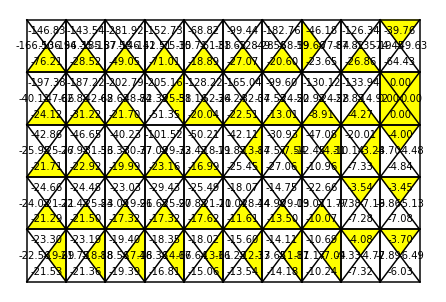

In [23]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.table import Table
def drawTable(data,filename):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(10):
    for j in range(5):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[j][i])
      if data[j][i][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow')) #左
      if data[j][i][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow')) #上
      if data[j][i][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))#右
      if data[j][i][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))#下

      plt.text(i+0.2,j+0.5,'%.2f' %data[j][i][1], verticalalignment='center', horizontalalignment='center')#左
      plt.text(i+0.5,j+0.2,'%.2f' %data[j][i][2], verticalalignment='center', horizontalalignment='center')#上
      plt.text(i+0.8,j+0.5,'%.2f' %data[j][i][3], verticalalignment='center', horizontalalignment='center')#右
      plt.text(i+0.5,j+0.8,'%.2f' %data[j][i][0], verticalalignment='center', horizontalalignment='center')#下

Q_sarsa=sarsa(10000)[1]
Q_sarsa5=sarsa5(n=5,episode=10000)[1]
drawTable(np.rot90(Q_sarsa,1),'sarsa.png')
drawTable(np.rot90(Q_sarsa5,1),'sarsa5.png')


2.Plot the average returns of Sarsa and 5-steps Sarsa, and explain your result(15%)

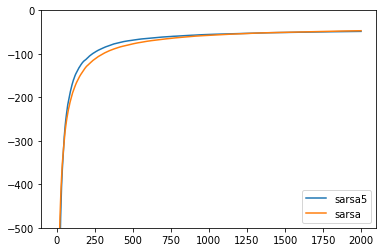

In [16]:
plt.plot(np.average([averages(sarsa5(episode=2000)[0]) for i in range(30)],axis=0),label='sarsa5')
plt.plot(np.average([averages(sarsa(2000)[0]) for i in range(30)],axis=0),label='sarsa')
plt.ylim(-500, 0)
plt.legend()
plt.show()

3. Varying n-steps and get average returns, then compare by overlap the plot(10%)

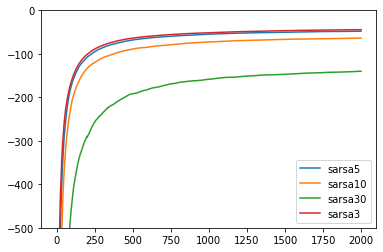

In [ ]:
plt.plot(np.average([averages(sarsa5(episode=2000)[0]) for i in range(30)],axis=0),label='sarsa5')
plt.plot(np.average([averages(sarsa5(n=10,episode=2000)[0]) for i in range(30)],axis=0),label='sarsa10')
plt.plot(np.average([averages(sarsa5(n=30,episode=2000)[0]) for i in range(30)],axis=0),label='sarsa30')
plt.plot(np.average([averages(sarsa5(n=3,episode=2000)[0]) for i in range(30)],axis=0),label='sarsa3')
# plt.plot(np.average([averages(sarsa5(n=2,episode=2000)[0]) for i in range(30)],axis=0),label='sarsa2')
plt.ylim(-500, 0)
plt.legend()
plt.show()